<a href="https://colab.research.google.com/github/BeMindYou/Lesson/blob/main/Tensorflow/%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%BE_%D1%81%D0%BE%D1%81%D1%82%D1%8F%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D1%8C_%D0%BD%D0%B0_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек
1. **Импорт TensorFlow:** Импортирует библиотеку TensorFlow для создания и обучения нейронных сетей.
2. **Импорт Keras из TensorFlow:** Импортирует модуль Keras, предоставляющий высокоуровневый интерфейс для нейронных сетей.
3. **Импорт слоев из Keras:** Импортирует слои для построения нейронных сетей, такие как полносвязные, сверточные, нормализации и активации.
4. **Импорт Matplotlib:** Импортирует библиотеку Matplotlib для визуализации данных и графиков.
5. **Импорт NumPy:** Импортирует библиотеку NumPy для работы с многомерными массивами и численными операциями.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных MNIST:
Эта строка кода загружает набор данных MNIST, который содержит изображения рукописных цифр от 0 до 9.

**Разделение на тренировочный и тестовый наборы:**
* `x_train`,` y_train`: Тренировочные данные и соответствующие им метки.
* `x_test`, `y_test`: Тестовые данные и соответствующие им метки.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Подготовка данных:

1. **Создание TensorFlow Dataset:** Создаёт объект `Dataset` из массива `x_train`.
2. **Функция обработки изображений:** Нормализует, добавляет канал и изменяет размер изображений.
3. **Применение функции:** Применяет `process_x` ко всем изображениям в `x_dataset`.
4. **Перемешивание данных:** Перемешивает данные для улучшения обучения.
5. **Установка размера пакета:** Разделяет данные на пакеты по 256 изображений.
6. **Оптимизация производительности:** Кэширует данные и выполняет предвыборку для ускорения обучения.

In [3]:
# Создание TensorFlow Dataset из тренировочных изображений
x_dataset = tf.data.Dataset.from_tensor_slices(x_train)

# Функция для обработки изображений
def process_x(x):
    img = (tf.cast(x, tf.float32) - 127.5) / 127.5  # Нормализация пикселей в диапазоне [-1, 1]
    img = tf.expand_dims(img, axis=2)  # Добавление дополнительного измерения для каналов
    img = tf.image.resize(img, (32, 32))  # Изменение размера изображений до 32x32 пикселей
    return img

# Применение функции обработки к Dataset
dataset = x_dataset.map(process_x)

# Перемешивание данных
dataset = dataset.shuffle(1000)

# Установка размера пакета (batch size)
bs = 256
dataset = dataset.batch(bs)

# Оптимизация производительности
AUTOTUNE = tf.data.AUTOTUNE
dataset = dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Визуализация:

1. **Создание функции отображения изображений:** Определяет функцию `imshow` для визуализации изображений.
2. **Установка количества изображений и размера фигуры:** Задает количество изображений для отображения (n = 10) и размер фигуры (10x6).
3. **Получение одной партии изображений:** Берет одну партию изображений из набора данных.
4. **Цикл для отображения изображений:** Проходит через первые `n` изображений в партии и отображает каждое из них.
5. **Создание подграфика:** Создает подграфик для каждого изображения и отключает оси.
6. **Отображение графика:** Показывает итоговый график с изображениями.

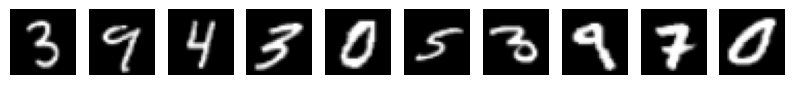

In [4]:
# Функция для отображения изображений из набора данных
def imshow():
    n = 10  # Количество изображений для отображения
    plt.figure(figsize=(10, 6))  # Установка размера фигуры
    for images in dataset.take(1):  # Берем одну партию изображений из набора данных
        for i in range(n):
            img = images[i]  # Получаем i-е изображение из партии

            ax = plt.subplot(3, n, i + 1 + n)  # Создаем подграфик для изображения
            plt.imshow(img, cmap='gist_gray')  # Отображаем изображение в градациях серого
            plt.axis('off')  # Отключаем оси
            ax.get_yaxis().set_visible(False)  # Скрываем ось Y
    plt.show()  # Отображаем график

# Вызов функции для отображения изображений
imshow()

# Создаем нейросеть Генератор :

1. **Входной слой:** Определяет входной слой с формой (128,).
2. **Полносвязный слой:** Создает полносвязный слой, нормализует и применяет активацию LeakyReLU.
3. **Изменение формы:** Преобразует форму тензора на (8, 8, 256).
4. **Первый транспонированный сверточный слой:** Применяет сверточный слой, нормализует и применяет активацию LeakyReLU.
5. **Второй транспонированный сверточный слой:** Увеличивает размер изображения до 16x16, нормализует и применяет активацию LeakyReLU.
6. **Третий транспонированный сверточный слой:** Увеличивает размер изображения до 32x32, нормализует и применяет активацию LeakyReLU.
7. **Финальный транспонированный сверточный слой:** Применяет сверточный слой с активацией tanh для генерации окончательного изображения.
8. **Создание модели:** Определяет модель генератора с заданными входами и выходами.

In [5]:
# Определение входного слоя
inputs = Input(shape=(128,))

# Полносвязный слой с последующей нормализацией и активацией LeakyReLU
x = Dense(8*8*256, use_bias=False)(inputs)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# Изменение формы тензора на (8, 8, 256)
x = Reshape((8, 8, 256))(x)

# Транспонированный сверточный слой с последующей нормализацией и активацией LeakyReLU
x = Conv2DTranspose(256, 3, strides=(1, 1), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# Транспонированный сверточный слой для увеличения размера изображения до 16x16
x = Conv2DTranspose(128, 3, strides=(2, 2), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# Транспонированный сверточный слой для увеличения размера изображения до 32x32
x = Conv2DTranspose(64, 3, strides=(2, 2), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# Финальный транспонированный сверточный слой с активацией tanh для генерации окончательного изображения
x = Conv2DTranspose(1, 3, strides=(1, 1), padding='same', use_bias=False, activation='tanh')(x)

# Определение выходного слоя
outputs = x

# Создание модели генератора
generator = keras.Model(inputs, outputs)

Посмотрим, что у нас получилось.

In [11]:
generator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense (Dense)               (None, 16384)             2097152   
                                                                 
 batch_normalization (Batch  (None, 16384)             65536     
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16384)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 256)         589824    
 anspose)                                                    

# Создаем нейросеть Дискриминатор:

1. **Входной слой:** Определяет входной слой с формой (32, 32, 1).
2. **Первый сверточный слой:** Создает сверточный слой с активацией LeakyReLU и Dropout для регуляризации.
3. **Второй сверточный слой:** Применяет ещё один сверточный слой с активацией LeakyReLU и Dropout.
4. **Третий сверточный слой:** Применяет третий сверточный слой с активацией LeakyReLU и Dropout.
5. **Преобразование формы:** Преобразует многомерный тензор в одномерный вектор.
6. **Полносвязный слой:** Создает полносвязный слой с активацией сигмоиды для получения вероятности (классификации).
7. **Создание модели:** Определяет модель дискриминатора с заданными входами и выходами.

In [6]:
# Определение входного слоя
inputs = Input(shape=(32, 32, 1))

# Первый сверточный слой с активацией LeakyReLU и Dropout
x = Conv2D(64, 3, strides=(2, 2), padding='same')(inputs)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

# Второй сверточный слой с активацией LeakyReLU и Dropout
x = Conv2D(128, 3, strides=(2, 2), padding='same')(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

# Третий сверточный слой с активацией LeakyReLU и Dropout
x = Conv2D(128, 3, strides=(2, 2), padding='same')(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

# Преобразование многомерного тензора в одномерный вектор
x = Flatten()(x)

# Полносвязный слой с активацией сигмоиды для получения вероятности
x = Dense(1, activation='sigmoid')(x)

# Определение выходного слоя
outputs = x

# Создание модели дискриминатора
discriminator = keras.Model(inputs, outputs)

# Класс модели:

1. **Определение класса модели GAN:** Класс `Model` наследует `tf.keras.Model` и содержит генератор и дискриминатор.
2. **Инициализация:** Конструктор принимает генератор и дискриминатор, и создает оптимизаторы для них.
3. **Функция потерь:** `gan_loss` вычисляет бинарную кросс-энтропию для реальных или фейковых изображений.
4. **Шаг обучения:** `training_step` выполняет один шаг обучения, включая генерацию фейковых изображений, вычисление потерь, и обновление весов генератора и дискриминатора.
5. **Запись и применение градиентов:** Использует `tf.GradientTape` для записи градиентов и применения их с помощью оптимизаторов.

In [7]:
# Определение класса модели GAN, который наследует tf.keras.Model
class Model(tf.keras.Model):
    def __init__(self, gen, disc):
        super(Model, self).__init__()
        self.gen = gen  # Генератор
        self.disc = disc  # Дискриминатор

        self.gen_optimizer = tf.keras.optimizers.Adam(1e-4)  # Оптимизатор для генератора
        self.disc_optimizer = tf.keras.optimizers.Adam(1e-4)  # Оптимизатор для дискриминатора

    # Функция для вычисления потерь GAN
    def gan_loss(self, logits, is_real):
        if is_real:
            labels = tf.ones_like(logits)  # Метки для реальных изображений (1)
        else:
            labels = tf.zeros_like(logits)  # Метки для фейковых изображений (0)
        loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels, logits)  # Вычисление бинарной кросс-энтропии
        return loss

    # Определение шага обучения с декоратором tf.function для оптимизации
    @tf.function
    def training_step(self, x):
        noise = tf.random.normal([bs, 128], 0, 1, tf.float32)  # Генерация случайного шума

        # Запись градиентов для дискриминатора и генератора
        with tf.GradientTape() as disc_tape, tf.GradientTape() as gen_tape:
            fake_images = self.gen(noise, training=True)  # Создание фейковых изображений генератором
            real_images = x  # Реальные изображения

            fake_result = self.disc(fake_images, training=True)  # Результаты дискриминатора для фейковых изображений
            real_result = self.disc(real_images, training=True)  # Результаты дискриминатора для реальных изображений

            # Вычисление потерь дискриминатора для фейковых и реальных изображений
            disc_fake_loss = self.gan_loss(fake_result, False)
            disc_real_loss = self.gan_loss(real_result, True)
            disc_loss = disc_fake_loss + disc_real_loss  # Общие потери дискриминатора

            # Вычисление потерь генератора
            gen_loss = self.gan_loss(fake_result, True)

        # Вычисление и применение градиентов дискриминатора
        disc_gradients = disc_tape.gradient(disc_loss, self.disc.trainable_variables)
        self.disc_optimizer.apply_gradients(zip(disc_gradients, self.disc.trainable_variables))

        # Вычисление и применение градиентов генератора
        gen_gradients = gen_tape.gradient(gen_loss, self.gen.trainable_variables)
        self.gen_optimizer.apply_gradients(zip(gen_gradients, self.gen.trainable_variables))

        return tf.reduce_mean(disc_loss)  # Возвращает среднее значение потерь дискриминатора

# Создаем объект модели

 `Model`, используя ранее определенные `generator` и `discriminator`.

1. **Создание модели:**
   - `generator` и `discriminator` — это экземпляры моделей генератора и дискриминатора, соответственно.
   - `Model(generator, discriminator)` создает экземпляр класса `Model`, передавая в качестве аргументов объекты `generator` и `discriminator`.

2. **Использование `Model` класса:**
   - Класс `Model`, определенный ранее, управляет обучением генератора и дискриминатора для реализации алгоритма генеративно-состязательных сетей (GAN).
   - В конструкторе класса `Model` происходит инициализация оптимизаторов для генератора и дискриминатора.
   - Метод `training_step` класса `Model` выполняет один шаг обучения, включая вычисление потерь, вычисление и применение градиентов.

3. **Применение модели:**
   - `model = Model(generator, discriminator)` создает экземпляр модели, который можно использовать для обучения GAN на данных.
   - Этот объект `model` будет содержать как генератор, так и дискриминатор, а также методы для выполнения обучающих шагов.

In [8]:
model = Model(generator, discriminator)

# Генерация и сравнение изображений:

1. **Инициализация параметров:**
   - `n = 10`: Количество изображений, которые будут сгенерированы и отображены.
   - `plt.figure(figsize=(10, 6))`: Создание фигуры matplotlib для отображения изображений.

2. **Загрузка данных:**
   - `for ii in dataset.take(1): ims = ii`: Загрузка одного батча изображений из датасета `dataset`.

3. **Генерация и отображение изображений:**
   - Цикл `for i in range(n)` выполняется `n` раз:
     - `img = model.gen(tf.random.normal([1, 128], 0, 1, tf.float32))`: Генерация фейкового изображения с помощью модели генератора `model.gen`.
     - `img = tf.squeeze(img, axis=0)`: Уменьшение размерности изображения для удаления измерения пакета.
     - `plt.imshow(img * 127.5 + 127.5, cmap='gist_gray')`: Отображение сгенерированного изображения с восстановлением оригинального масштаба (от -1 до 1).
     - `plt.title(model.disc(tf.expand_dims(img, axis=0)).numpy()[0][0])`: Отображение вероятности, предсказанной дискриминатором `model.disc` для фейкового изображения.
     - `plt.imshow(ims[i] * 127.5 + 127.5, cmap='gist_gray')`: Отображение реального изображения из датасета с тем же масштабированием.
     - `plt.title(model.disc(tf.expand_dims(ims[i], axis=0)).numpy()[0][0])`: Отображение вероятности, предсказанной дискриминатором `model.disc` для реального изображения.

4. **Отображение результатов:**
   - `plt.show()`: Отображение всех созданных графиков сгенерированных и реальных изображений с их вероятностями.

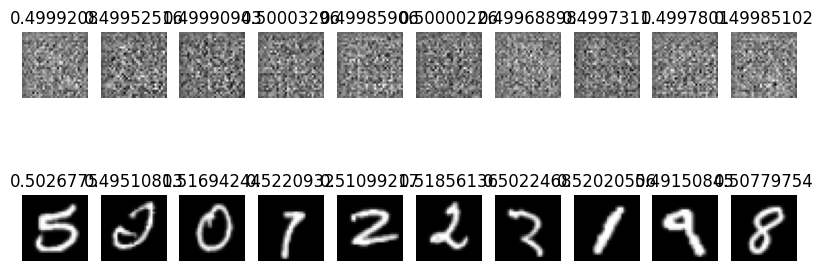

In [9]:
def generate():
    n = 10  # Количество изображений для генерации и отображения
    plt.figure(figsize=(10, 6))  # Создание фигуры для отображения изображений

    for ii in dataset.take(1):  # Загрузка одного батча изображений из датасета
        ims = ii

    for i in range(n):
        # Генерация фейкового изображения с помощью модели генератора
        img = model.gen(tf.random.normal([1, 128], 0, 1, tf.float32))
        img = tf.squeeze(img, axis=0)  # Уменьшение размерности изображения
        ax = plt.subplot(3, n, i + 1)  # Создание подграфика для отображения сгенерированного изображения
        # Отображение сгенерированного изображения
        plt.imshow(img * 127.5 + 127.5, cmap='gist_gray')
        # Отображение вероятности реальности изображения (близкой к 1 для реальных, к 0 для фейковых)
        plt.title(model.disc(tf.expand_dims(img, axis=0)).numpy()[0][0])
        plt.axis('off')  # Скрытие осей на графиках

        ax = plt.subplot(3, n, i + 1 + n)  # Создание подграфика для отображения реального изображения
        # Отображение реального изображения из датасета
        plt.imshow(ims[i] * 127.5 + 127.5, cmap='gist_gray')
        # Отображение вероятности реальности реального изображения
        plt.title(model.disc(tf.expand_dims(ims[i], axis=0)).numpy()[0][0])
        plt.axis('off')  # Скрытие осей на графиках

    plt.show()  # Отображение всех созданных графиков

# Обучения GAN на протяжении нескольких эпох и визуализация результатов.

1. **Инициализация параметров:**
   - `epochs = 50`: Количество эпох обучения, то есть количество полных проходов по всему датасету.
   - `from IPython.display import clear_output`: Импорт функции `clear_output`, которая используется для очистки вывода в Jupyter Notebook.
   - `hist = np.array(np.empty([0]))`: Инициализация пустого массива `hist` для сохранения истории потерь.

2. **Цикл обучения:**
   - Внешний цикл `for epoch in range(1, epochs + 1)` проходит по заданному числу эпох.
   - Внутренний цикл `for step, x in enumerate(dataset)` выполняет обучение модели на каждом шаге в датасете `dataset`.

3. **Выполнение обучения:**
   - `loss = model.training_step(x)`: Выполнение одного шага обучения модели `model` на текущем батче `x` из датасета.
   - `if step % 50 == 0`: Условие для вывода результатов каждые 50 шагов.

4. **Визуализация результатов:**
   - `clear_output(wait=True)`: Очистка вывода в текущей ячейке, чтобы графики и вывод были актуальными.
   - `print(epoch)`: Вывод номера текущей эпохи для отслеживания прогресса обучения.
   - `hist = np.append(hist, loss)`: Добавление текущего значения потери в массив `hist` для построения истории потерь.
   - `plt.plot(np.arange(0, len(hist)), hist)`: Построение графика истории потерь на основе массива `hist`.
   - `plt.show()`: Отображение построенного графика потерь.
   - `generate()`: Вызов функции `generate()`, которая генерирует и отображает изображения, созданные моделью в текущем состоянии.


50


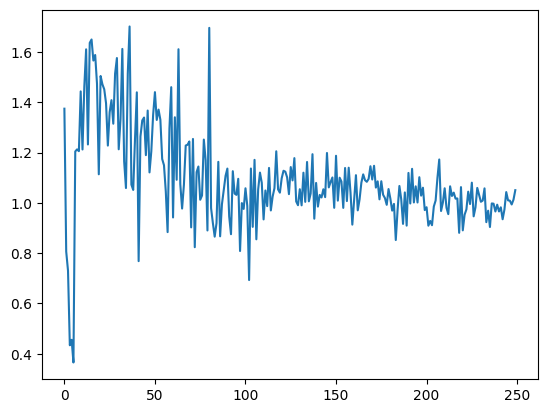

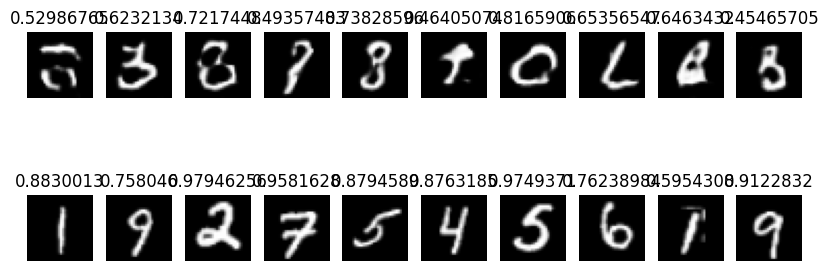

In [10]:
epochs = 50  # Количество эпох обучения
from IPython.display import clear_output  # Импорт функции для очистки вывода в Jupyter Notebook
hist = np.array(np.empty([0]))  # Инициализация массива для сохранения истории потерь

for epoch in range(1, epochs + 1):
    # Цикл по эпохам обучения
    for step, x in enumerate(dataset):
        # Цикл по шагам в датасете
        loss = model.training_step(x)  # Выполнение одного шага обучения модели

        if step % 50 == 0:
            clear_output(wait=True)  # Очистка вывода в ячейке перед выводом новых данных
            print(epoch)  # Вывод номера текущей эпохи
            hist = np.append(hist, loss)  # Добавление текущей потери в историю
            plt.plot(np.arange(0, len(hist)), hist)  # Построение графика истории потерь
            plt.show()  # Отображение графика потерь
            generate()  # Генерация и отображение изображений с помощью функции generate()